# Case study 

The Chennai Housing Dataset is a derived from information collected by the India Census Service concerning housing in the area of Chennai Tamil Nadu.

 We need to analyse the dataset and understand how to different columns are related to each other or not and provide a detail analysis for the dataset.
 
#### Data feilds

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 
25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Chennai employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

Blacks_town - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage of  lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


## Content
1) Importing Libraries
 
2) Initial analysis by looking at the data
 
3) reading the data

4) Data Normalisation

5) performing EDA

6) Data cleaning

7) Null Value treatment

8) Checking for outliers

9) New feature adding

10) Correlation Analysis

11) Plotting graphs

12) Conclusion

13) Suggestion

# Importing Libraries

In [176]:
# Let us import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import re

#### Initial Analysis from the dataset

1) need to seperate the data into multiple columns

2) Check for the null values if present

3) check for the outliers in the data if present

4) need to check for any correlation in the data

5) need to check the avg crime rate and how it is effecting the other factors

6) how the nox column is affecting the other columns

7) checking how pupil teacher and lower population stats are related

8) checking for trends for most of the columns

## Data
Reading the data from the csv file

In [177]:
#load the csv file
#store the data in df
#assigning no headers to the dataset or else the first column would be treated as column name
df=pd.read_csv('data_4.csv',encoding= 'unicode_escape',header=None)
df

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...
...,...
501,0.06263 0.00 11.930 0 0.5730 6.5930 69...
502,0.04527 0.00 11.930 0 0.5730 6.1200 76...
503,0.06076 0.00 11.930 0 0.5730 6.9760 91...
504,0.10959 0.00 11.930 0 0.5730 6.7940 89...


### Data Normalisation

In [178]:
#removing the spaces before and after each value of column
df[0]=df[0].str.strip()

In [179]:
#if their are more than one spaces then replacing it with just one space to help when splitting it
df[0]=df[0].str.replace(r'\s+',' ')

C:\Users\Subhajit_Chandra\AppData\Local\Temp\ipykernel_22464\1493123467.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[0]=df[0].str.replace(r'\s+',' ')


In [180]:
#splitting the columns according space 
new=list(df[0].str.split(" "))
new

[['0.00632',
  '18.00',
  '2.310',
  '0',
  '0.5380',
  '6.5750',
  '65.20',
  '4.0900',
  '1',
  '296.0',
  '15.30',
  '396.90',
  '4.98',
  '24.00'],
 ['0.02731',
  '0.00',
  '7.070',
  '0',
  '0.4690',
  '6.4210',
  '78.90',
  '4.9671',
  '2',
  '242.0',
  '17.80',
  '396.90',
  '9.14',
  '21.60'],
 ['0.02729',
  '0.00',
  '7.070',
  '0',
  '0.4690',
  '7.1850',
  '61.10',
  '4.9671',
  '2',
  '242.0',
  '17.80',
  '392.83',
  '4.03',
  '34.70'],
 ['0.03237',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '6.9980',
  '45.80',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '394.63',
  '2.94',
  '33.40'],
 ['0.06905',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '7.1470',
  '54.20',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '396.90',
  '5.33',
  '36.20'],
 ['0.02985',
  '0.00',
  '2.180',
  '0',
  '0.4580',
  '6.4300',
  '58.70',
  '6.0622',
  '3',
  '222.0',
  '18.70',
  '394.12',
  '5.21',
  '28.70'],
 ['0.08829',
  '12.50',
  '7.870',
  '0',
  '0.5240',
  '6.0120',
  '66.60',
  '5.5605',
  '5

##### as we can see that each part is divided into 14 columns now so we just nee to assign the column names now to the list

In [181]:
# Assigning the column name to the feilds to help in the analysis
df_new=pd.DataFrame(new,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','Blacks_town','LSTAT','MEDV'])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Blacks_town,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


##### after splitting and assigning column names to the dataset accordingly as mentioned in the case stydu now we shall perform our EDA

# Explanatory Data Analysis
Lets begin EDA ,we start by checking out the columns present

In [182]:
#Getting the size of the dataset
df_new.shape

(506, 14)

###### Interpretation-
the data has 506 observations and 14 variables

In [183]:
#Using 'column' to check the features of the data
df_new.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'Blacks_town', 'LSTAT', 'MEDV'],
      dtype='object')

###### Getting concise summary of a dataframe

In [184]:
# Using 'info' to understand the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CRIM         506 non-null    object
 1   ZN           506 non-null    object
 2   INDUS        506 non-null    object
 3   CHAS         506 non-null    object
 4   NOX          506 non-null    object
 5   RM           506 non-null    object
 6   AGE          506 non-null    object
 7   DIS          506 non-null    object
 8   RAD          506 non-null    object
 9   TAX          506 non-null    object
 10  PTRATIO      506 non-null    object
 11  Blacks_town  506 non-null    object
 12  LSTAT        506 non-null    object
 13  MEDV         506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


##### Interpretation
All the values are categorical here which is not helpful for analysis we need to convert it to int or float 

## Data cleaning 

In [185]:
#Converting all the columns into float for futher analysis
df_new = df_new.apply(pd.to_numeric, errors='ignore', downcast='float')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float32
 1   ZN           506 non-null    float32
 2   INDUS        506 non-null    float32
 3   CHAS         506 non-null    float32
 4   NOX          506 non-null    float32
 5   RM           506 non-null    float32
 6   AGE          506 non-null    float32
 7   DIS          506 non-null    float32
 8   RAD          506 non-null    float32
 9   TAX          506 non-null    float32
 10  PTRATIO      506 non-null    float32
 11  Blacks_town  506 non-null    float32
 12  LSTAT        506 non-null    float32
 13  MEDV         506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


##### Interpretation
Now from the case study we explore that the column 'Chas' is a categorical data so changing it to a categorical variable

### Describing the dataset

In [186]:
#Using 'describe' to understand the dataset
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


##### Interpretation

here in the data set CRIM,ZN,INDUS,AGE,RAD,TAX,Blacks_town (these features that contains outliers(huge difference between mean and median(50%))

##### Conclusion from the overview 

the data has 506 observations and 14 variables

We need to work on 'Chas' column feature A code indicating 1:tract bounds; 0: no bounds


In [187]:
#seeing the value count of CHAS to see the elements
df_new.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

#### Interpretation
Here we have only two types of CHAS so lets convert it into categories

In [188]:
#Changing the datatype of 'Chas' to object again
df_new['CHAS']=df_new['CHAS'].astype(object)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float32
 1   ZN           506 non-null    float32
 2   INDUS        506 non-null    float32
 3   CHAS         506 non-null    object 
 4   NOX          506 non-null    float32
 5   RM           506 non-null    float32
 6   AGE          506 non-null    float32
 7   DIS          506 non-null    float32
 8   RAD          506 non-null    float32
 9   TAX          506 non-null    float32
 10  PTRATIO      506 non-null    float32
 11  Blacks_town  506 non-null    float32
 12  LSTAT        506 non-null    float32
 13  MEDV         506 non-null    float32
dtypes: float32(13), object(1)
memory usage: 29.8+ KB


## Data Interpretation
Now we can see tthat all the columns have their desired datatypes

### Null values treatment


In [189]:
#Checking for the null values
df_new.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
Blacks_town    0
LSTAT          0
MEDV           0
dtype: int64

##### Interpretation
Since their are no null values in the dataset so treatment is not required

## Outlier detection

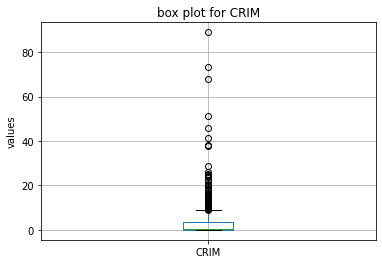

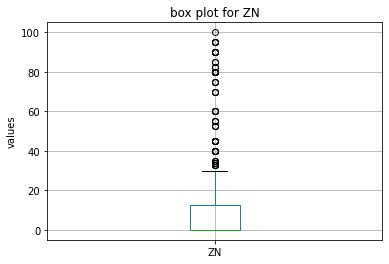

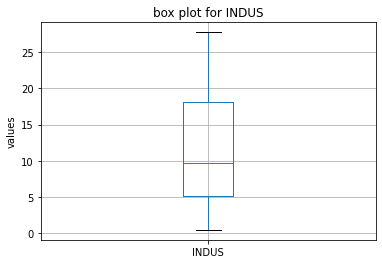

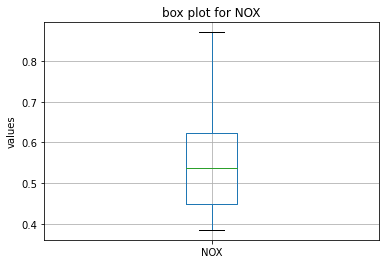

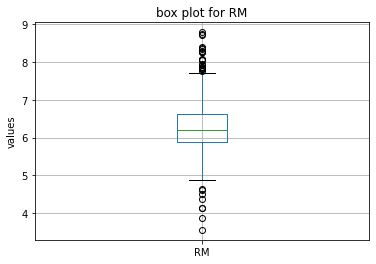

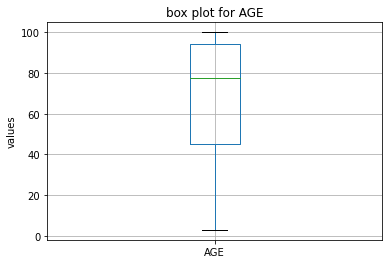

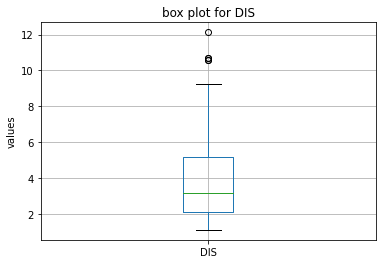

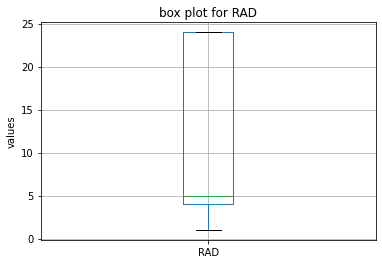

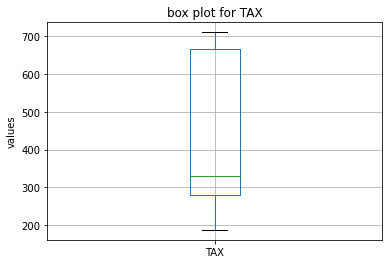

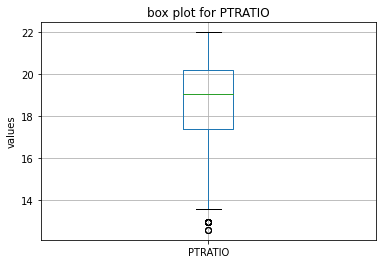

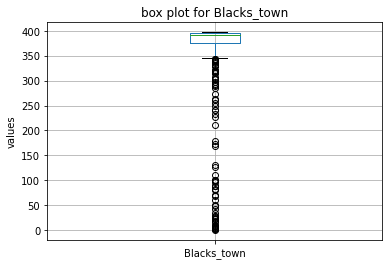

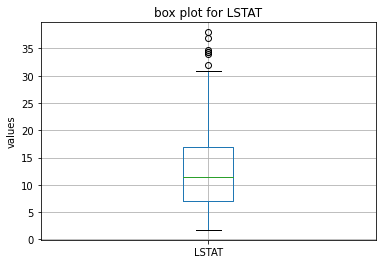

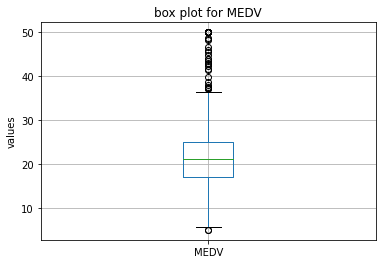

In [190]:
#plotting box plot to detect the ouliers in the data so that we can decide if we will use mean or median to replace the null values
dfbox=df_new[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','Blacks_town','LSTAT','MEDV']]
for column in dfbox:
    plt.figure()
    plt.title("box plot for "+column)
    plt.ylabel("values")
    df_new.boxplot([column])

#### observation from this we can see that

 1) column CRIM has outliers above approx 10 
 
 2) column ZN has outliers above approx 30
 
 3) Their are no outliers in INDUS
 
 4) Their are no outliers in NOX
 
 5) column RM has outliers below approx 4.9 and above 7.7 
 
 6) Their is no outlier in AGE
 
 7) Column DIS has outliers above around 10.5
 
 8) Their are no outliers in RAD
 
 9) Their are no outliers in TAX
 
 10) Column ptratio has outliers below 13.7
 
 11) Column Balcks_town above 350
 
 12) Column Lstat has outliers above 32 around
 
 13) column MEDV has outliers above 36 around

### NEW Feature
no new feature derivation for my analysis was required

# Corelation Analysis


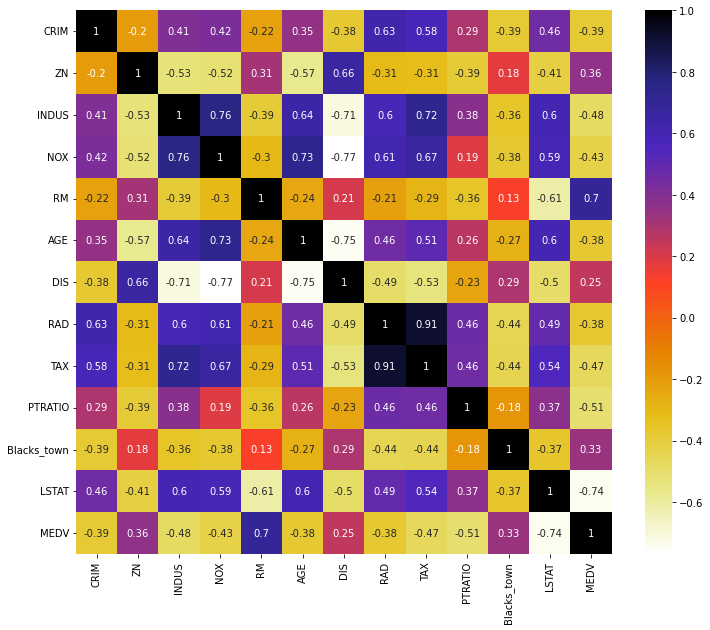

In [191]:
#Correlation matrix using heat map
plt.figure(figsize=(12,10))
cor=df_new.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#### Observation 

from the above heatmap we can see that TAX And RAD are corelated to each other by 91%

while noone of them are them are positively or negatively correlated with  more than 80% 

### Modularisation
 No modularisation was required as such because their were no repeating codes

## Plotting The Graph

In [192]:
#Displaying the dataset for planning the visualisation
df_new


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Blacks_town,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


In [193]:
# replacing the categorical column having 0 with no bounds and 1 with river bounds
df_new.CHAS.replace({1.0:'River bound',0.0:'No bounds'},inplace =True)
df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Blacks_town,LSTAT,MEDV
0,0.00632,18.0,2.31,No bounds,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,No bounds,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,No bounds,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,No bounds,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,No bounds,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,No bounds,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,No bounds,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,No bounds,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,No bounds,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


#### Univariet Analysis

C:\Users\Subhajit_Chandra\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


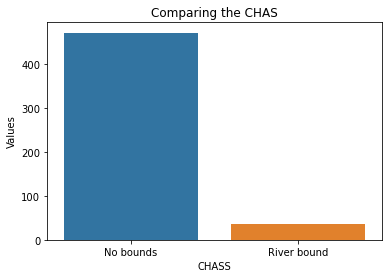

In [194]:
#plotting a bar graph to know which CHAS is more
sns.countplot(df_new.CHAS)
plt.xlabel("CHASS")
plt.ylabel("Values")
plt.title("Comparing the CHAS")
plt.show()

#### Observation 
We see that CHAS - Charles River dummy variable has more of no bounds than river bound

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


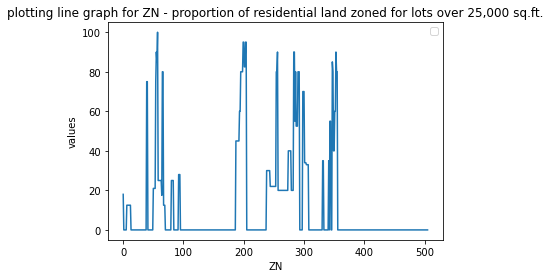

In [195]:
#plotting the graph for Zn to see the trends 
plt.plot(df_new['ZN'])
plt.title("plotting line graph for ZN - proportion of residential land zoned for lots over 25,000 sq.ft.")
plt.xlabel("ZN")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation 
We can observe that the ZN is has most of the highest values concentrated in the 0-100 and 300-400 region 

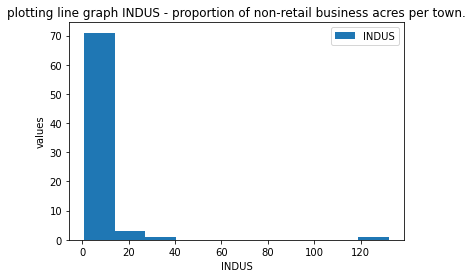

In [196]:
#Plotting a histogram to determine the INDUS of Town
df_new['INDUS'].value_counts().plot(kind='hist')
plt.title("plotting line graph INDUS - proportion of non-retail business acres per town.")
plt.xlabel("INDUS")
plt.ylabel("values")
plt.legend()
plt.show()

##### Observation
We can analyse that ht enon retail business is more around 0-10 on an overall basis

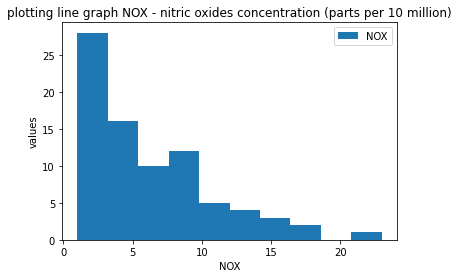

In [197]:
#Plotting a histogram to see the NOX of a town 
df_new['NOX'].value_counts().plot(kind='hist')
plt.title("plotting line graph NOX - nitric oxides concentration (parts per 10 million)")
plt.xlabel("NOX")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation 

Most of the towns have the nitric oxides concentration between 1 and 10 so we can say that it is over all less

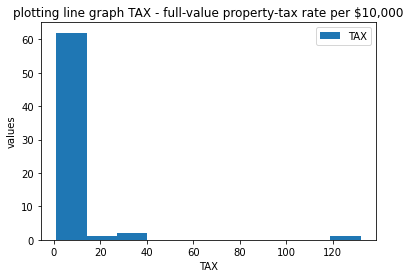

In [198]:
#Plotting a histogram to see the TAX of a town 
df_new['TAX'].value_counts().plot(kind='hist')
plt.title("plotting line graph TAX - full-value property-tax rate per $10,000")
plt.xlabel("TAX")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation 
From the above graph we see that the TAX - full-value property-tax rate per $10,000 is highest which is 60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


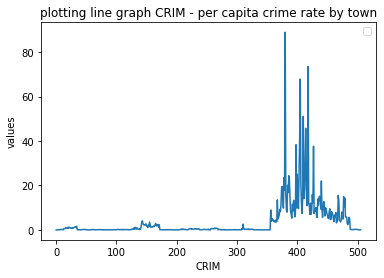

In [199]:
#Plotting a histogram to see the CRIM of a town 
plt.plot(df_new['CRIM'])
plt.title("plotting line graph CRIM - per capita crime rate by town")
plt.xlabel("CRIM")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation
From the above graph we can see the highest crime rate is aorund 80

#### Bivarient Analysis

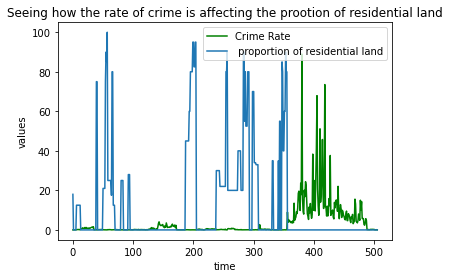

In [200]:
#plotting a line line graph to see for how the crime rate is affecting the propotion of residential land 
plt.plot(df_new['CRIM'],color='g',label='Crime Rate')
plt.plot(df_new['ZN'],label=' proportion of residential land')
plt.title("Seeing how the rate of crime is affecting the prootion of residential land")
plt.xlabel("time")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation
From the above plot we can see that as the crime rate in increasing the portion of residential land is decreasing

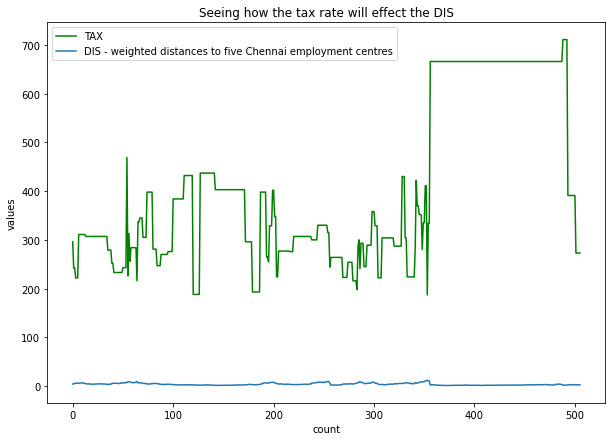

In [201]:
#plotting a line line graph to see for how the tax rate is DIS
plt.figure(figsize=(10,7))
plt.plot(df_new['TAX'],color='g',label='TAX')
plt.plot(df_new['DIS'],label='DIS - weighted distances to five Chennai employment centres')
plt.title("Seeing how the tax rate will effect the DIS")
plt.xlabel("count")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation

We can see that Tax is not reated to the DIS - weighted distances to five Chennai employment centres as DIS is remaining almost constant while tax is changing

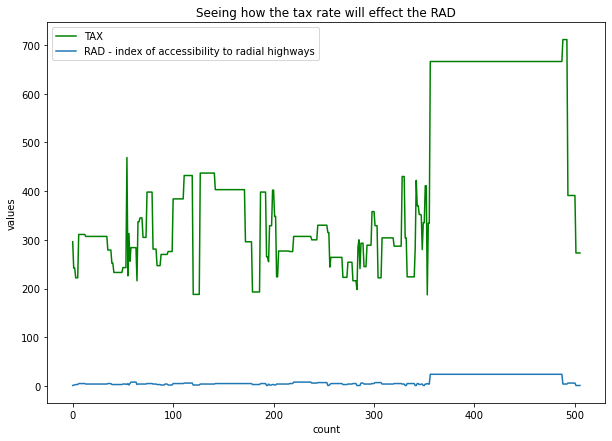

In [202]:
#plotting a line line graph to see for how the tax rate is affecting RAD
plt.figure(figsize=(10,7))
plt.plot(df_new['TAX'],color='g',label='TAX')
plt.plot(df_new['RAD'],label='RAD - index of accessibility to radial highways')
plt.title("Seeing how the tax rate will effect the RAD")
plt.xlabel("count")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation
 FRom the above graph we observe that between 350 and 500 when the tax increased hugely the RAD was also affected and it also increased

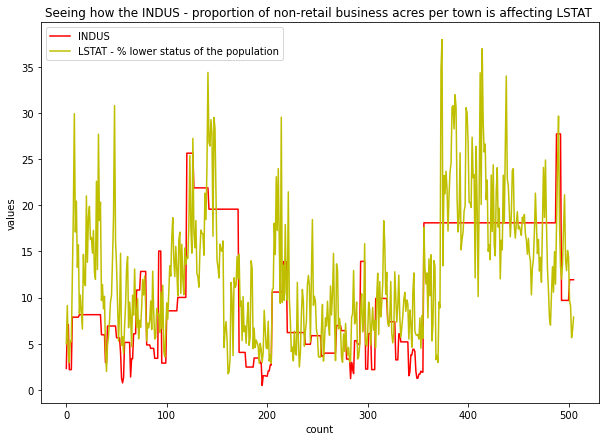

In [203]:
#plotting a line line graph to see for how the INDUS is affecting LSTAT
plt.figure(figsize=(10,7))
plt.plot(df_new['INDUS'],color='r',label='INDUS')
plt.plot(df_new['LSTAT'],color='y',label='LSTAT - % lower status of the population')
plt.title("Seeing how the INDUS - proportion of non-retail business acres per town is affecting LSTAT ")
plt.xlabel("count")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation 
From the above graph we see that as the LSTAT is increasing the INDUS is also increasing and as the LSTAT is decreasing the INDUS is also decreasing so we can come to a conclusion that both are related to each other

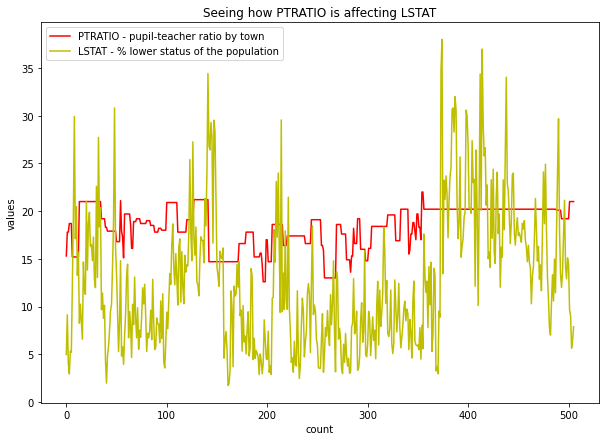

In [204]:
#plotting a line line graph to see for how the PTRATIO is affecting LSTAT
plt.figure(figsize=(10,7))
plt.plot(df_new['PTRATIO'],color='r',label='PTRATIO - pupil-teacher ratio by town')
plt.plot(df_new['LSTAT'],color='y',label='LSTAT - % lower status of the population')
plt.title("Seeing how PTRATIO is affecting LSTAT")
plt.xlabel("count")
plt.ylabel("values")
plt.legend()
plt.show()

#### Observation
From the above graph we see that pupil student ratio is creating a cmpact in the lower status ratio as both are more or less dependent on each other we can see

In [205]:
#sorting the top 20 crime rate in descending order and storing in a dataset
sort_descend=df_new.sort_values(by='CRIM',ascending=False).head(20)
sort_descend

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Blacks_town,LSTAT,MEDV
380,88.976196,0.0,18.1,No bounds,0.671,6.968,91.900002,1.4165,24.0,666.0,20.200001,396.899994,17.209999,10.400000
418,73.534103,0.0,18.1,No bounds,0.679,5.957,100.000000,1.8026,24.0,666.0,20.200001,16.450001,20.620001,8.800000
405,67.920799,0.0,18.1,No bounds,0.693,5.683,100.000000,1.4254,24.0,666.0,20.200001,384.970001,22.980000,5.000000
410,51.135799,0.0,18.1,No bounds,0.597,5.757,100.000000,1.4130,24.0,666.0,20.200001,2.600000,10.110000,15.000000
414,45.746101,0.0,18.1,No bounds,0.693,4.519,100.000000,1.6582,24.0,666.0,20.200001,88.269997,36.980000,7.000000
404,41.529202,0.0,18.1,No bounds,0.693,5.531,85.400002,1.6074,24.0,666.0,20.200001,329.459991,27.379999,8.500000
398,38.351799,0.0,18.1,No bounds,0.693,5.453,100.000000,1.4896,24.0,666.0,20.200001,396.899994,30.590000,5.000000
427,37.661900,0.0,18.1,No bounds,0.679,6.202,78.699997,1.8629,24.0,666.0,20.200001,18.820000,14.520000,10.900000
413,28.655800,0.0,18.1,No bounds,0.597,5.155,100.000000,1.5894,24.0,666.0,20.200001,210.970001,20.080000,16.299999
417,25.940599,0.0,18.1,No bounds,0.679,5.304,89.099998,1.6475,24.0,666.0,20.200001,127.360001,26.639999,10.400000


##### Interpretation 
sorted the dataset accoring to top 20 high crime rates

In [206]:
#sorting the top 20 crime rate in descending order and storing in a dataset 
sort_ascend=df_new.sort_values(by='CRIM').head(20)
sort_ascend

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Blacks_town,LSTAT,MEDV
0,0.00632,18.0,2.31,No bounds,0.5380,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
284,0.00906,90.0,2.97,No bounds,0.4000,7.088,20.799999,7.3073,1.0,285.0,15.300000,394.720001,7.85,32.200001
285,0.01096,55.0,2.25,No bounds,0.3890,6.453,31.900000,7.3073,1.0,300.0,15.300000,394.720001,8.23,22.000000
341,0.01301,35.0,1.52,No bounds,0.4420,7.241,49.299999,7.0379,1.0,284.0,15.500000,394.739990,5.49,32.700001
55,0.01311,90.0,1.22,No bounds,0.4030,7.249,21.900000,8.6966,5.0,226.0,17.900000,395.929993,4.81,35.400002
54,0.01360,75.0,4.00,No bounds,0.4100,5.888,47.599998,7.3197,3.0,469.0,21.100000,396.899994,14.80,18.900000
195,0.01381,80.0,0.46,No bounds,0.4220,7.875,32.000000,5.6484,4.0,255.0,14.400000,394.230011,2.97,50.000000
57,0.01432,100.0,1.32,No bounds,0.4110,6.816,40.500000,8.3248,5.0,256.0,15.100000,392.899994,3.95,31.600000
194,0.01439,60.0,2.93,No bounds,0.4010,6.604,18.799999,6.2196,1.0,265.0,15.600000,376.700012,4.38,29.100000
348,0.01501,80.0,2.01,No bounds,0.4350,6.635,29.700001,8.3440,4.0,280.0,17.000000,390.940002,5.99,24.500000


#### Interpretation
sorted the dataset according to top 20 low crime rates

#### Multivarient Analysis

<AxesSubplot:title={'center':'Bar plot for high crime rate vs AGE and pollution and blacks in town'}, xlabel='Crime Rate', ylabel='values'>

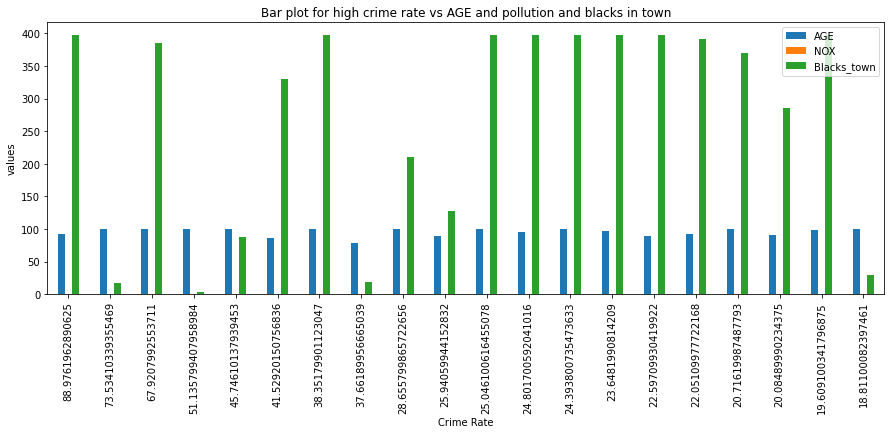

In [207]:
#plotting a bar graph to understand the how the Higher crime rates affect the age,NOX, blacks town column
sort_descend.plot(x='CRIM',y=['AGE','NOX','Blacks_town'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                  title="Bar plot for high crime rate vs AGE and pollution and blacks in town")



<AxesSubplot:title={'center':'Bar plot for lower crime rate vs AGE and pollution and blacks in town'}, xlabel='Crime Rate', ylabel='values'>

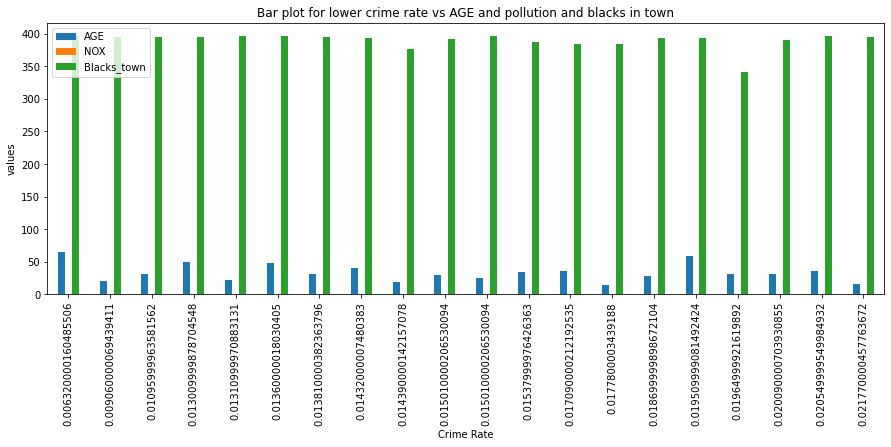

In [208]:
#plotting a bar graph to understand the how the lower crime rates affect the age,NOX, blacks town column
sort_ascend.plot(x='CRIM',y=['AGE','NOX','Blacks_town'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                 title="Bar plot for lower crime rate vs AGE and pollution and blacks in town")



#### Observation 

From the Above two graphs we notice that when crime rate are lowest then the Blacks in town are always high and when crime rates are high their is a constant rise and fall in the propotion of Blacks owned the town

We can see that crime rate has no effect on NOX 

The crime rate is high when the proportion of owner-occupied units built prior to 1940 is high so then can be directly related which is when the crime rates are low then the proportion of owner-occupied units built prior to 1940 is also low

<AxesSubplot:title={'center':'Bar plot for high crime rate vs ZN,INDUS,RM,DIS in town'}, xlabel='Crime Rate', ylabel='values'>

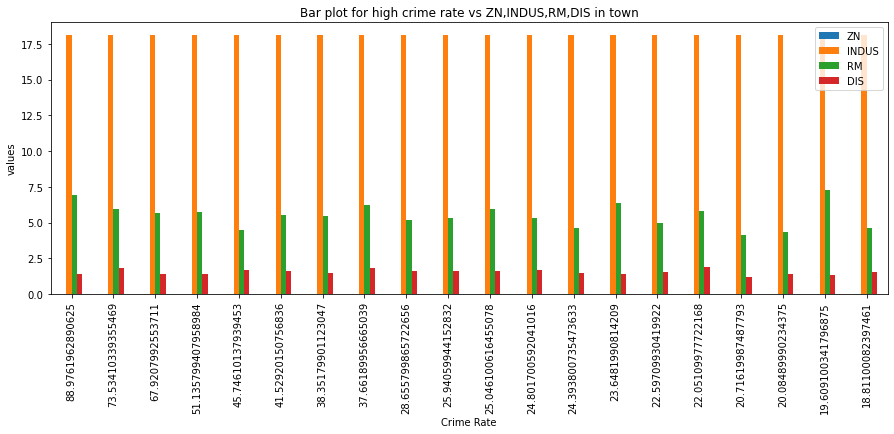

In [209]:
#plotting a bar graph to understand the how the Higher crime rates affect the  ZN,INDUS,RM,DIS
sort_descend.plot(x='CRIM',y=['ZN','INDUS','RM','DIS'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                  title="Bar plot for high crime rate vs ZN,INDUS,RM,DIS in town")



<AxesSubplot:title={'center':'Bar plot for low crime rate vs ZN,INDUS,RM,DIS in town'}, xlabel='Crime Rate', ylabel='values'>

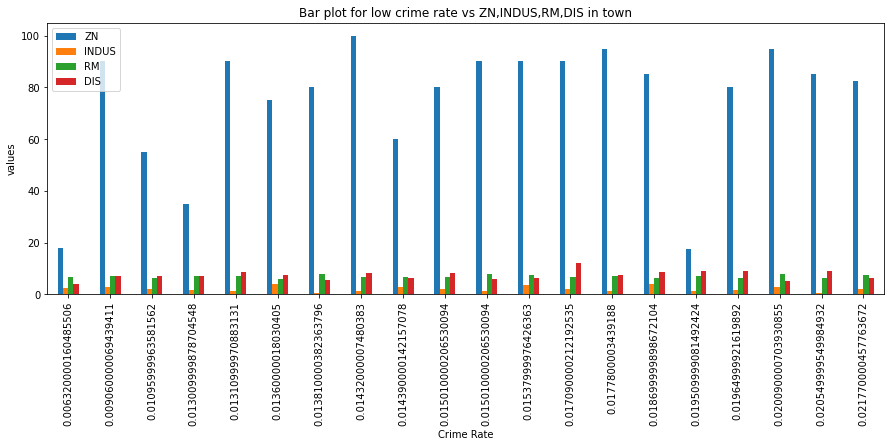

In [210]:
#plotting a bar graph to understand the how the lower crime rates affect the  ZN,INDUS,RM,DIS
sort_ascend.plot(x='CRIM',y=['ZN','INDUS','RM','DIS'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                 title="Bar plot for low crime rate vs ZN,INDUS,RM,DIS in town")



##### Observation
From the Above two graphs we notice that 

When the crime rates are higher proportion of non-retail business acres per town is very high while when the crime rates are at the lowest the proportion of non-retail business acres per town which is INDUS is very low

When the crime rates are high proportion of residential land zoned for lots over 25,000 sq.ft. which is ZN is very low like close to zero while when crime rates are at lowest proportion of residential land zoned for lots over 25,000 sq.ft which is  ZN 
is on an average very high

When the crime rates are higher average number of rooms per dwelling which is RM is higher as compared to when crime rates are low average number of rooms per dwelling is pretty low

When crime rates are high weighted distances to five Chennai employment centres or DIS are decreasing but when crime rates are low weighted distances to five Chennai employment centres or DIS is increased comparitively 

<AxesSubplot:title={'center':'Bar plot for high crime rate vs RAD,TAX,PTRATIO,LSTAT,MEDV in town'}, xlabel='Crime Rate', ylabel='values'>

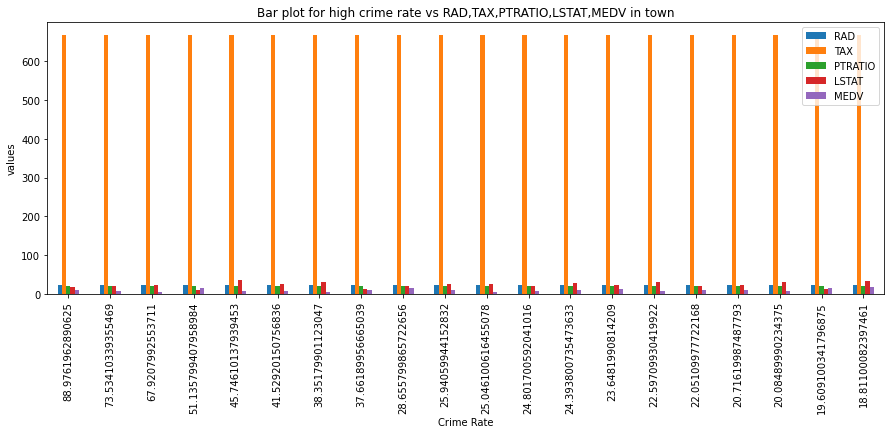

In [211]:
#plotting a bar graph to understand the how the higher crime rates affect the  RAD,TAX,PTRATIO,LSTAT,MEDV
sort_descend.plot(x='CRIM',y=['RAD','TAX','PTRATIO','LSTAT','MEDV'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                  title="Bar plot for high crime rate vs RAD,TAX,PTRATIO,LSTAT,MEDV in town")


<AxesSubplot:title={'center':'Bar plot for low crime rate vs RAD,TAX,PTRATIO,LSTAT,MEDV in town'}, xlabel='Crime Rate', ylabel='values'>

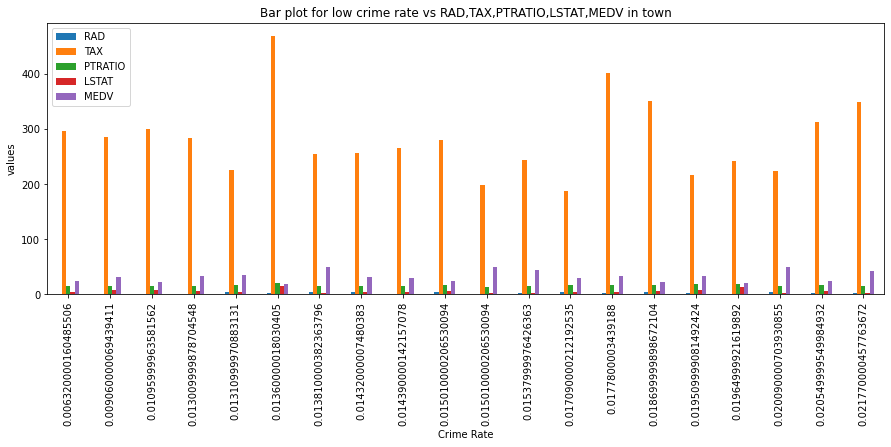

In [212]:
#plotting a bar graph to understand the how the LOWER crime rates affect the  RAD,TAX,PTRATIO,LSTAT,MEDV
sort_ascend.plot(x='CRIM',y=['RAD','TAX','PTRATIO','LSTAT','MEDV'],kind='bar',
             figsize= (15,5),xlabel="Crime Rate",ylabel="values",
                 title="Bar plot for low crime rate vs RAD,TAX,PTRATIO,LSTAT,MEDV in town")



#### Observation
From the Above two graphs we notice that 
 
When the crime rates are higher TAX - full-value property-tax rate per $10,000 is also pretty high while when the crime rate is  low TAX - full-value property-tax rate per dollar 10,000 is variable and not constant high or low

When the crime rate are high RAD - index of accessibility to radial highways is high but when the crime rates are low RAD - index of accessibility to radial highways is also very low comparitively

When crime rates are high PTRATIO - pupil-teacher ratio by town is also more as compared to when crime rates are lower it is also low

when crime rates are high LSTAT - percentage of lower status of the population are higher as compared when the crime rates are low then LSTAT - percentage of lower status of the population is also low

When crime rates are high we can see that MEDV - Median value of owner-occupied homes in $1000's is low as compared to when the MEDV - Median value of owner-occupied homes in dollar 1000'is higher when crime rates are low






## Conclusion

1) The Chas value has more of no tract bounds river that river bounds

2) The non retail business were highest at 70 

3) The nitric oxides concentration is mostly highest between 1-10

4) We see that tax highest paid is 60

5) the highest rate of crime is around 80

 From the bivarient analysis we see that 
 
1) crime rate nad proportion of residential land are oppositely related if one increases the other become zero and vice-versa

2) Tax and DIS are not related to each other

3) TAX and RAD are a little bit related that is when the TAX went very high the RAD also increased a bit

4) We see that INDUS and LSTAT are related highly that is when one increases the other also increa and vice-versa


5) We see that PRATIO and LSTAT are also related as one PTRATIO increase the LSTAT increases hugely and vice-versa

 From the multivarient analysis we see that 

1) From the Above two graphs we notice that when crime rate are lowest then the Blacks in town are always high and when crime rates are high their is a constant rise and fall in the propotion of Blacks owned the town

2) We can see that crime rate has no effect on NOX 

3) The crime rate is high when the proportion of owner-occupied units built prior to 1940 is high so then can be directly related which is when the crime rates are low then the proportion of owner-occupied units built prior to 1940 is also low

4) When the crime rates are higher proportion of non-retail business acres per town is very high while when the crime rates are at the lowest the proportion of non-retail business acres per town which is INDUS is very low

5) When the crime rates are high proportion of residential land zoned for lots over 25,000 sq.ft. which is ZN is very low like close to zero while when crime rates are at lowest proportion of residential land zoned for lots over 25,000 sq.ft which is  ZN is on an average very high

6) When the crime rates are higher average number of rooms per dwelling which is RM is higher as compared to when crime rates are low average number of rooms per dwelling is pretty low

7) When crime rates are high weighted distances to five Chennai employment centres or DIS are decreasing but when crime rates are low weighted distances to five Chennai employment centres or DIS is increased comparitively 

8) When the crime rates are higher TAX - full-value property-tax rate per dollar 10,000 is also pretty high while when the crime rate is  low TAX - full-value property-tax rate per dollar 10,000 is variable and not constant high or low

9) When the crime rate are high RAD - index of accessibility to radial highways is high but when the crime rates are low RAD - index of accessibility to radial highways is also very low comparitively

10) When crime rates are high PTRATIO - pupil-teacher ratio by town is also more as compared to when crime rates are lower it is also low

11) when crime rates are high LSTAT - percentage of lower status of the population are higher as compared when the crime rates are low then LSTAT - percentage of lower status of the population is also low

12) When crime rates are high we can see that MEDV - Median value of owner-occupied homes in dollar 1000's is low as compared to when the MEDV - Median value of owner-occupied homes in dollar 1000'is higher when crime rates are low

## Suggestion

1) proportion of non-retail business acres per town when increases it effects the  % lower status of the population

2) pupil-teacher ratio by town when it increases after a while when the % lower status of the population increases

3) crime rates are heavely affecting the other columns in the dataset so we can say that crime rate is playing a important factor in the dataset
